In [50]:
import pandas as pd
import numpy as np

# For Box-Cox Transformation
from scipy import stats

import sys
# !{sys.executable} -m pip install mlxtend

# For min_max scaling
from mlxtend.preprocessing import minmax_scaling

# Plotting modules
import seaborn as sns
# !{sys.executable} -m pip install missingno
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")
df.head()

# print(df['PassengerId'].len())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to explore what was the most important factor in deciding if a user would survive the titanic or not. The categories I can explore are Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked. SibSp indicates the number of siblings or spouses, and Parch indicates the number of parents and children. I also know we have 891 passengers on board of the Titanic.

First, let's clean up the data. I want to see how many missing values there are.

In [61]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# Look at the number of missing points per column
missing_values_count[0:12]

print(missing_values_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Unnamed: 12    891
Unnamed: 13    891
Unnamed: 14    891
Unnamed: 15    891
Unnamed: 16    891
Unnamed: 17    891
Unnamed: 18    891
Unnamed: 19    889
dtype: int64


We have 891 total entries in this csv. So, since we have 177 missing values for age and 687 for cabin, I will be more mindful of how the data for age will not have the most accurate representation.

I want an overview of how many passengers survived the Titanic.

In [5]:
# get the number of 1 in survived column
survived_count = df['Survived'].sum()

# Look at the number of surviving passengers
print(survived_count)


342


So, out of 892 passengers, 342 survived. That's 38.34%. Now, let's see which variables were indicators of survival.

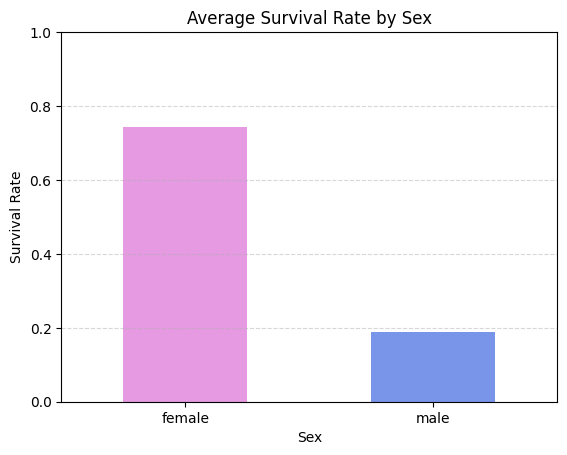

In [52]:
# seeing if sex is a variable indicating survival


sex_rates = df.groupby('Sex')['Survived'].mean()

# Plot as a bar chart
sex_rates.plot(
    kind='bar',
    color=['orchid', 'royalblue'],
    alpha=0.7
)

plt.title('Average Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Because survival rate is between 0 and 1
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


We can see that looking at this, women were significantly more likely to survive than men. 

Now, let's take a look at pclass.

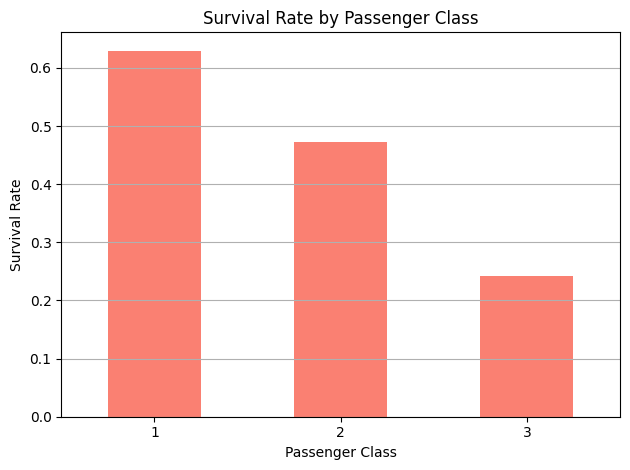

In [49]:
pclass_rate = df.groupby('Pclass')['Survived'].mean()

pclass_rate.plot(kind='bar', title='Survival Rate by Passenger Class', color = 'salmon')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



So, looks like passengers in Pclass 1 had the most chance of survival, then 2, then 3. Now, let's look at age.

/var/folders/8d/lgvc3b113_s4gj1qgkps3wgh0000gn/T/ipykernel_46522/4285675943.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)
/var/folders/8d/lgvc3b113_s4gj1qgkps3wgh0000gn/T/ipykernel_46522/4285675943.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rate = df_clean.groupby('AgeGroup')['Survived'].mean()


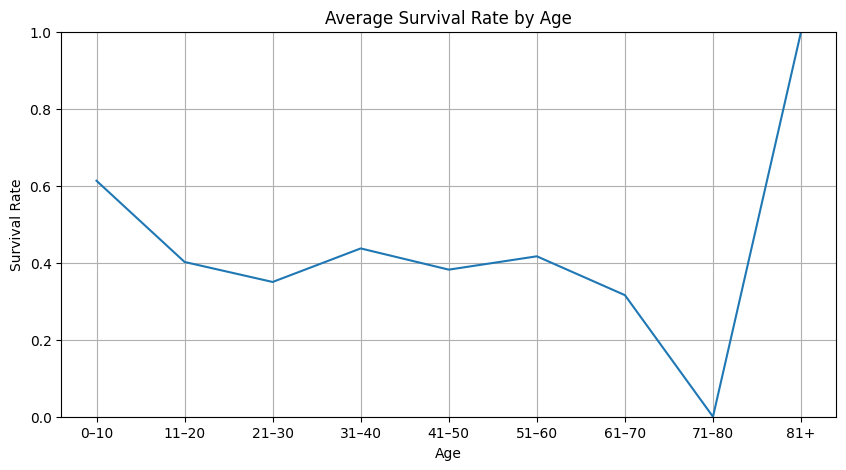

In [62]:
# checking age for survival indication

# removing empty values
df_clean = df.dropna(subset=['Age'])

# organizing by range
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]  # adjust as needed
labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']

# Cut ages into bins
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

age_rate = df_clean.groupby('AgeGroup')['Survived'].mean()

age_rate.plot(kind='line', figsize=(10, 5))
plt.title('Average Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


From this, we can see age is indicating survival, with the highest rate for ages older than 81 and younger than 10. The lowest rate of survival is for 71-80.

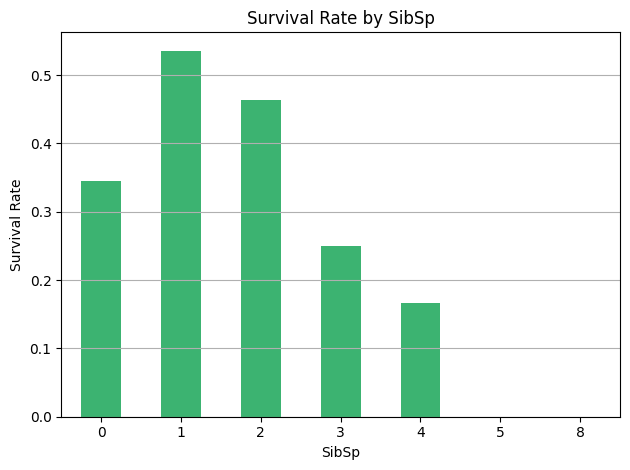

In [55]:
sibsp_rate = df.groupby('SibSp')['Survived'].mean()

sibsp_rate.plot(kind='bar', title='Survival Rate by SibSp', color = 'mediumseagreen')
plt.ylabel('Survival Rate')
plt.xlabel('SibSp')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


It looks like people with 1 sibling or spouse had the highest survival rate, followed by 2, then 0, then 3, then 4. Now, let's look at the number of parents and children.

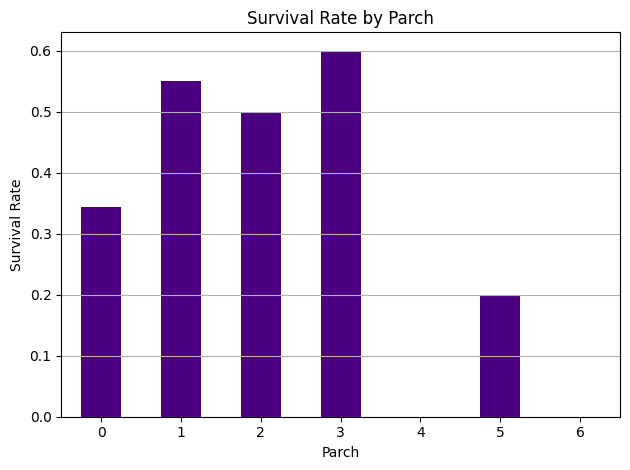

In [56]:
Parch_rate = df.groupby('Parch')['Survived'].mean()

Parch_rate.plot(kind='bar', title='Survival Rate by Parch', color = 'indigo')
plt.ylabel('Survival Rate')
plt.xlabel('Parch')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The highest survival rate is for people with 3 Parents or children,1, then 2, then 0, then 5. Let's look at fare now. 

/var/folders/8d/lgvc3b113_s4gj1qgkps3wgh0000gn/T/ipykernel_46522/4173735580.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_rate = df_clean.groupby('FareGroup')['Survived'].mean()


<Axes: xlabel='FareGroup'>

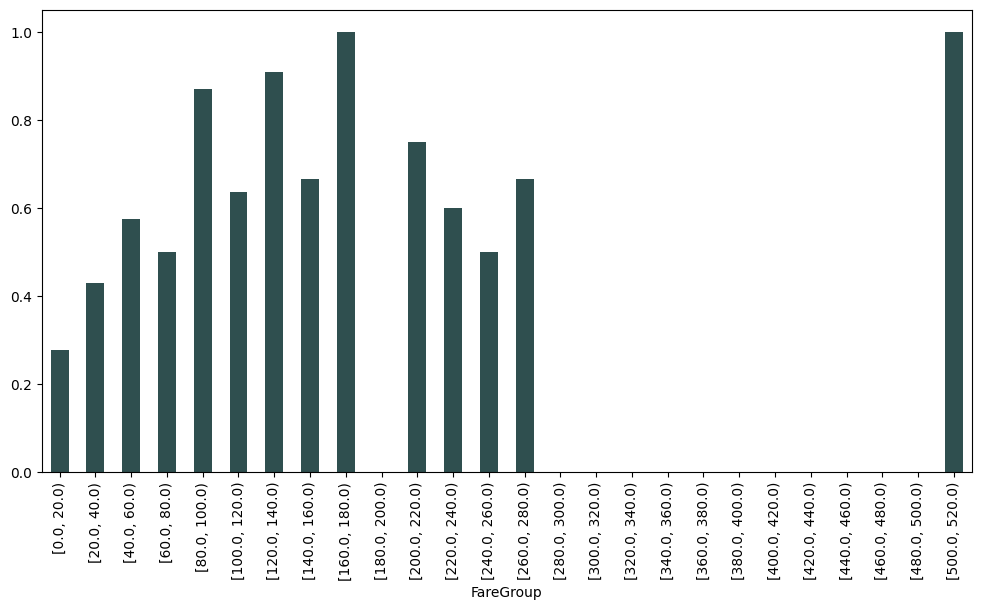

In [65]:
# checking age for survival indication

# removing empty values
df_clean = df.dropna(subset=['Fare'])

# creating bines
max_fare = df_clean['Fare'].max()
bins = np.arange(0, max_fare + 20, 20)

df_clean['FareGroup'] = pd.cut(df_clean['Fare'], bins=bins, right=False)
fare_rate = df_clean.groupby('FareGroup')['Survived'].mean()

fare_rate.plot(kind='bar', color='darkslategrey', figsize=(12, 6))



It looks like in general, higher fare does not necessarily indicate more of a survival chance. Let's look at tickets now. Since there are so many unique types of tickets and they aren't all numerical, it is hard to group by line chart or bar graph. So, I'm plotting the 20 most common tickets. 

<Axes: xlabel='Ticket'>

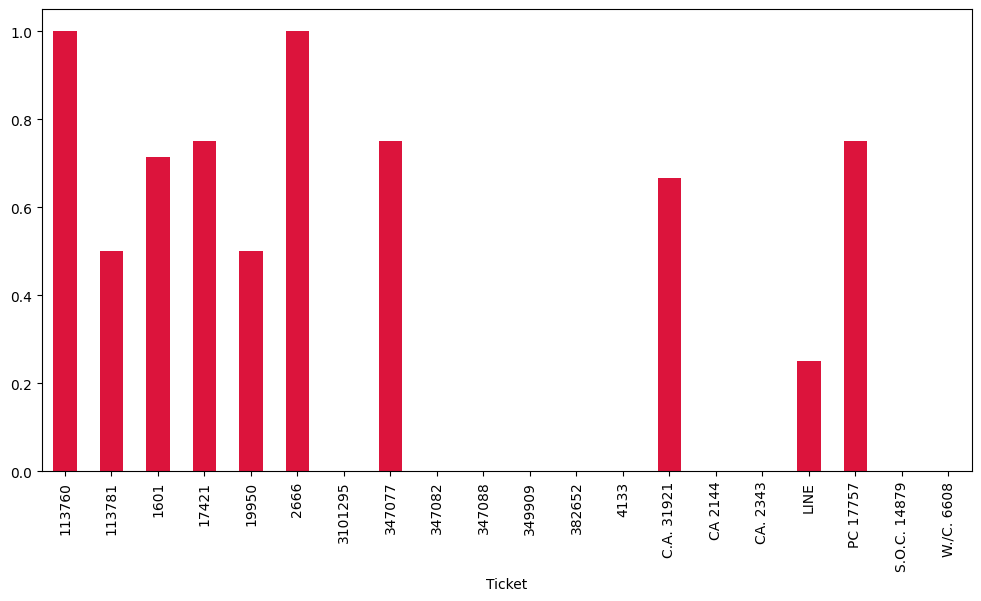

In [74]:
# ticket_rate = df.groupby('Ticket')['Survived'].mean()

# finding 20 most common tickes then plotting 
most_common = df['Ticket'].value_counts().head(20).index
df[df['Ticket'].isin(most_common)].groupby('Ticket')['Survived'].mean().plot(
    kind='bar', figsize=(12, 6), color='crimson'
)



In general, it does not look like ticket is a good indicator of survival. Now, let's take a look at cabins. I will be looking at the cabin level.

/var/folders/8d/lgvc3b113_s4gj1qgkps3wgh0000gn/T/ipykernel_46522/2493508427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CabinLetter'] = df_clean['Cabin'].str[0]


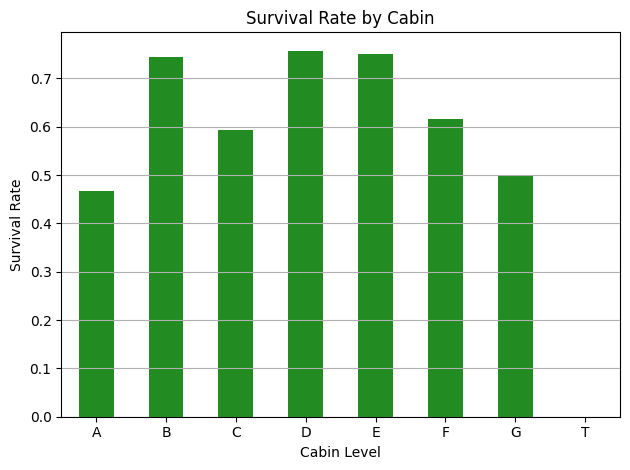

In [81]:
df_clean = df.dropna(subset=['Cabin'])
df_clean['CabinLetter'] = df_clean['Cabin'].str[0] 
df_cabin = df_clean.dropna(subset=['CabinLetter'])
cabin_rate = df_cabin.groupby('CabinLetter')['Survived'].mean()

cabin_rate.plot(kind='bar', title='Survival Rate by Cabin', color = 'forestgreen')
plt.ylabel('Survival Rate')
plt.xlabel('Cabin Level')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

We can see that cabins B, D, and E have the highest survival rates, with cabins A, T, and G having the lowest. Now, let's see where the passenger embarked from.

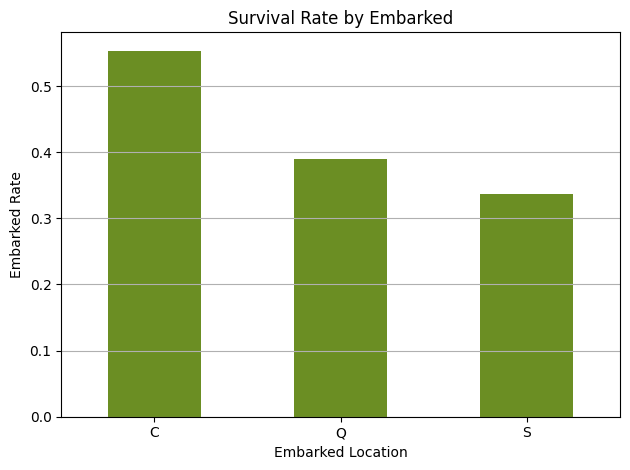

In [82]:
embark_rate = df.groupby('Embarked')['Survived'].mean()
embark_rate.plot(kind='bar', title='Survival Rate by Embarked', color = 'olivedrab')
plt.ylabel('Embarked Rate')
plt.xlabel('Embarked Location')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

It looks like everyone who left from C (Cherbourg) has the highest survival rate, then Q (Queensland), and then S (Southhampton).

Overall, it looks like the highest indication of survival is age (being older than 80), being in cabin levels B, D, and F, being a woman, and being in passenger class 1.
It looks like upper class passengers were given preference. It looks like women have higher survival rates than men, but it looks like children's survival rates were not significantly higher than the adults. In general, it looked liek people in pairs (siblings and spouses with only 1) had higher survival rates. 